In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
import gym
import gin
import numpy as np
import random
from vectorincrement import load_env
from vectorincrement.observation_encoder import KerasEncoderWrapper, get_obss_states
from gym.wrappers import TimeLimit
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
gin.enter_interactive_mode()
gin.parse_config_file('config/cartpole_linear.gin')

In [3]:
env = gym.make('VectorIncrement-v0')

In [4]:
env = load_env("VectorIncrement-v0", obs_scaler=0.1)

Make environment VectorIncrement-v0 None {}


In [5]:
env.reset()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
env.step(0)

(array([0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ], dtype=float32),
 0.0,
 False,
 {})

In [7]:
gin.enter_interactive_mode()

# just loading parameters, cannot really load the file because the dimension might be different
gin.parse_config_file('config/ve5_nonlinear.gin')
#gin.bind_parameter('observation_encoder.KerasEncoder.model_callable', None)

In [8]:
model_filename = gin.query_parameter('observation_encoder.KerasEncoder.model_filename')

In [9]:
env = load_env()
env = KerasEncoderWrapper(env, model_filename=model_filename)

Make environment VectorIncrement-v0 None {}
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
env

<KerasEncoderWrapper<ObservationScaleWrapper<TimeLimit<VectorIncrementEnvironment<VectorIncrement-v0>>>>>

In [11]:
def predict_states_from_obs(env, n_episodes=100, batch_size=256, epochs=100):
    """Get states/observations from the env on a random policy, fit a linear model and plot the loss."""

    obss, states = get_obss_states(env, n_episodes)
    m = tf.keras.Sequential([tf.keras.layers.Dense(states.shape[1], input_shape=(obss.shape[1],),
                                           activation=None)])
    m.compile('adam', 'mse')
    h = m.fit(obss, states, batch_size=batch_size, epochs=epochs, verbose=0)

    plt.title(f"state~model(obs), env={env} steps={len(obss)}")
    plt.plot(h.history['loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.show()

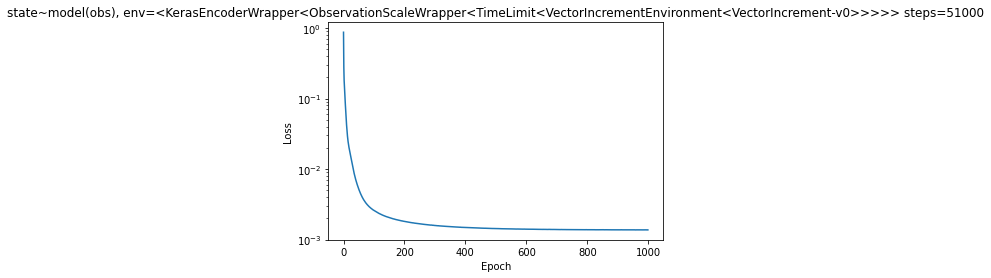

In [13]:
predict_states_from_obs(env=env, epochs=1000, n_episodes=1000)

#### Problem: encoder is too linear

In [2]:
import numpy as np

array([ 1.43810635e-03, -1.63123180e+00,  1.00279519e+00, -7.44871551e-01,
       -4.13743548e-01])

In [52]:
A

array([[ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [-1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.]])

In [53]:
?np.random.choice

array([[ 2.73074689, -1.82526323,  3.49102822, ..., -0.85344841,
         2.4653512 , -1.5731108 ],
       [ 4.55076102, -0.64949195, -3.60889104, ...,  0.6395188 ,
         0.37831978, -0.40516594],
       [ 0.28527565, -3.13772772,  3.93755996, ...,  2.06811252,
         1.84110535,  0.37241014],
       ...,
       [-5.17850651,  2.12802499, -3.77967786, ..., -1.64370786,
        -3.29846232,  2.85844292],
       [ 0.34246984,  1.65919468,  3.45100893, ..., -1.06392346,
         1.07903719, -2.82568712],
       [-0.37812741,  0.0865381 , -5.82863431, ..., -0.26305934,
        -3.20579016, -0.21341606]])